# MURAVES: muography experiment at the Vesuvious Mount

This tutorial shows how to use the muography MUYSC python code. The codes estimate:

* Volcano rock thickness
* Traversing muon flux
* Open sky muon flux
* Muon transmission
* Telescope acceptance, solid angle and activated pixels
* The measured muon flux
* The observation time


In [1]:
%env SRTM1_DIR=/home/jesus_rodriguez/backup/Python3.8/MURAVES/Data
%env SRTM3_DIR=/home/jesus_rodriguez/backup/Python3.8/MURAVES/Data

env: SRTM1_DIR=/home/jesus_rodriguez/backup/Python3.8/MURAVES/Data
env: SRTM3_DIR=/home/jesus_rodriguez/backup/Python3.8/MURAVES/Data


In [2]:
import MuyscImprove as Muysc
import Telescope as telescope

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
from scipy import signal
import matplotlib as mpl
import TopographyDownloader
from srtm import Srtm1HeightMapCollection

srtm1_data = Srtm1HeightMapCollection()
srtm1_data.build_file_index()

## Loading topography data

In [3]:
data_path = '/home/jesus_rodriguez/backup/Python3.8/MURAVES/Data'

# Casina Amelia observation point
Obs_P1 = [40.810561, 14.410686]
Ref_P = [40.823729, 14.424745]
Topography_cut = [40.7750, 40.8500, 14.4000, 14.5000, "Vesuvius"]

cenit = [-40,40,99]
azimut = [-40,40,99]

Measure = Muysc.Mute(Topography_cut, 80, srtm1_data, "jet")

## Measuring rock thickness

In [4]:
# If we don´t have the data already we inicialize the module topography
Measure.inicialize_Topography(data_path)

/home/jesus_rodriguez/backup/Python3.8/MURAVES/Data


In [5]:
Measure.elevation()

In [6]:
Measure.pointView(Obs_P1, Ref_P)

Elevation = 16.354940


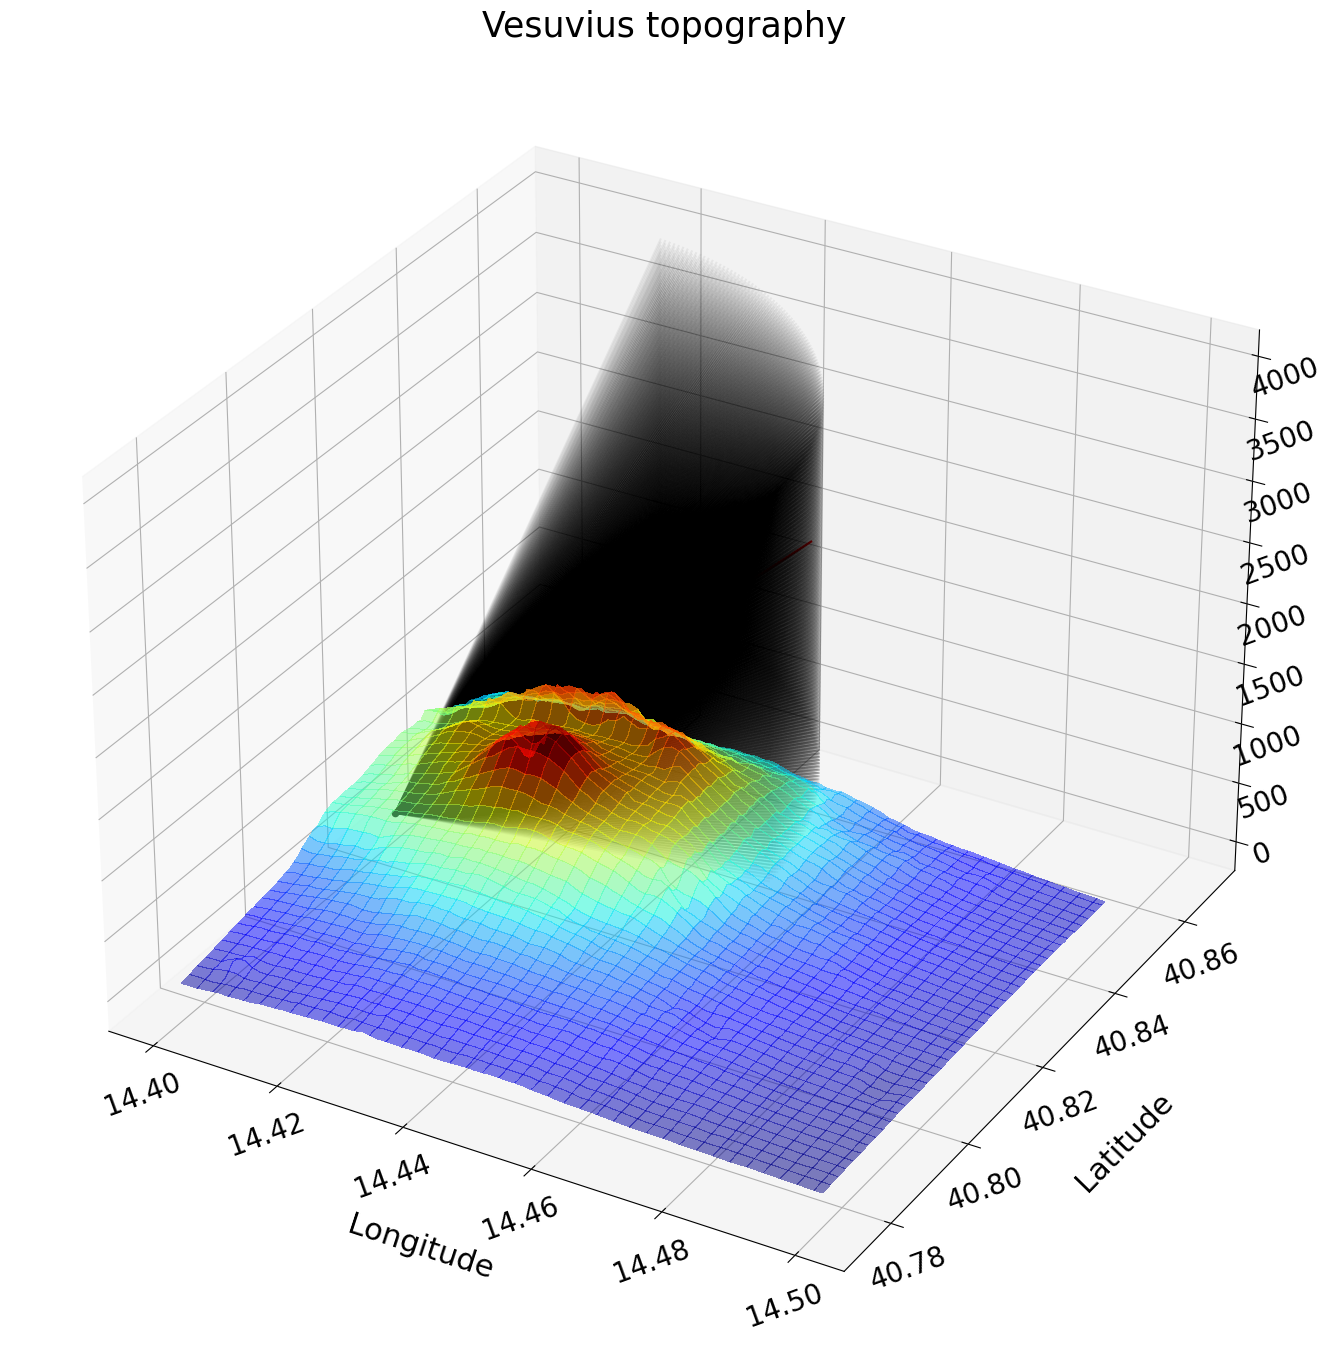

In [7]:
Measure.plot_lines(cenit, azimut) 

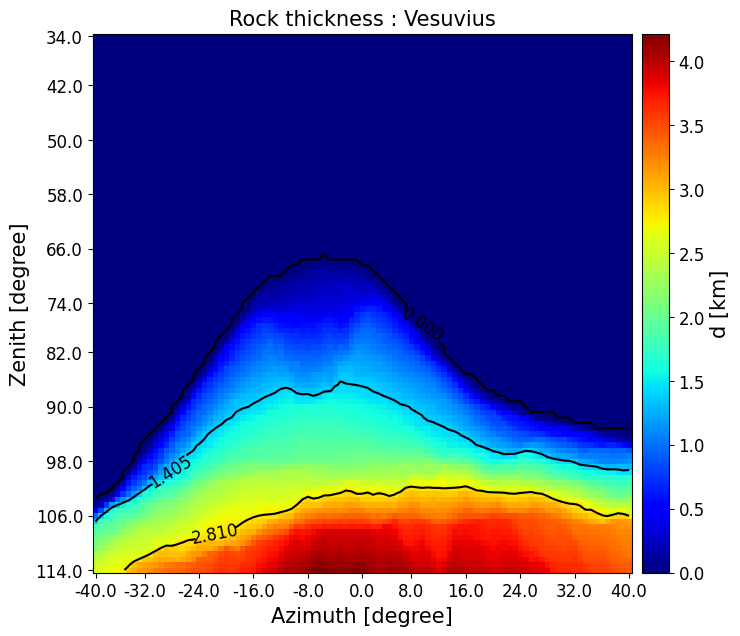

In [8]:
Measure.show_distances()

In [9]:
Measure.distances.max()

4215.442957517777

In [ ]:
dist_matrix = Measure.distances

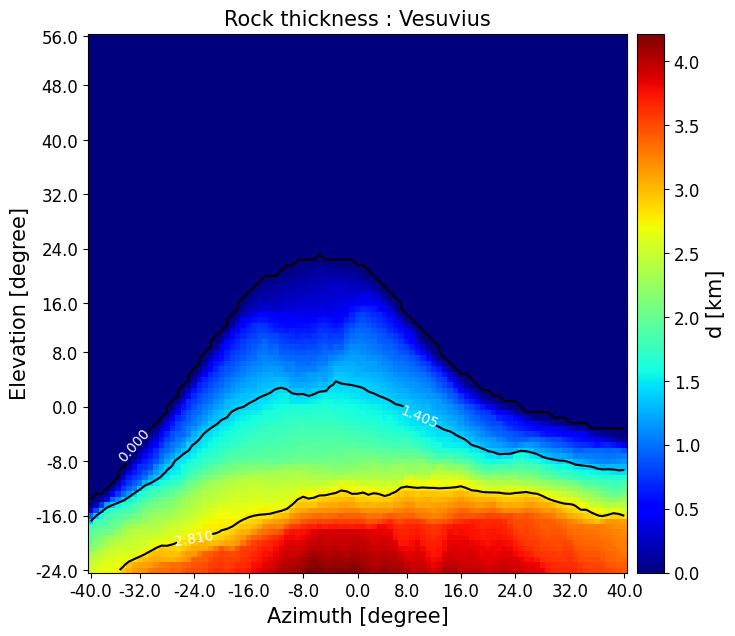

In [ ]:
Measure.show_distances_no_extent()

## Open sky and traversing muon flux

Elevation : 15.508170


/home/jesus_rodriguez/backup/Python3.8/MURAVES/FluxModels.py:83: RuntimeWarning: invalid value encountered in log10
  y = np.log10(p*np.cos(theta)) # Bugaev/Reyna model


Time: 85.302464 s


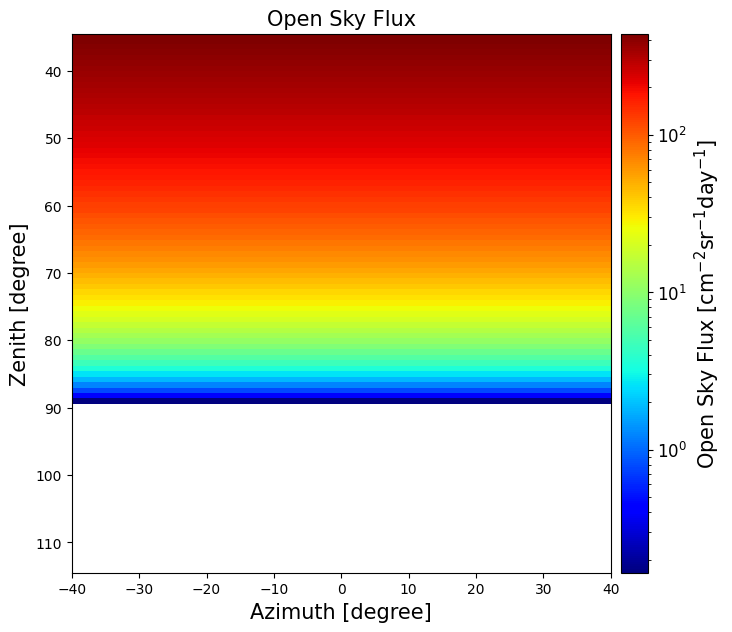

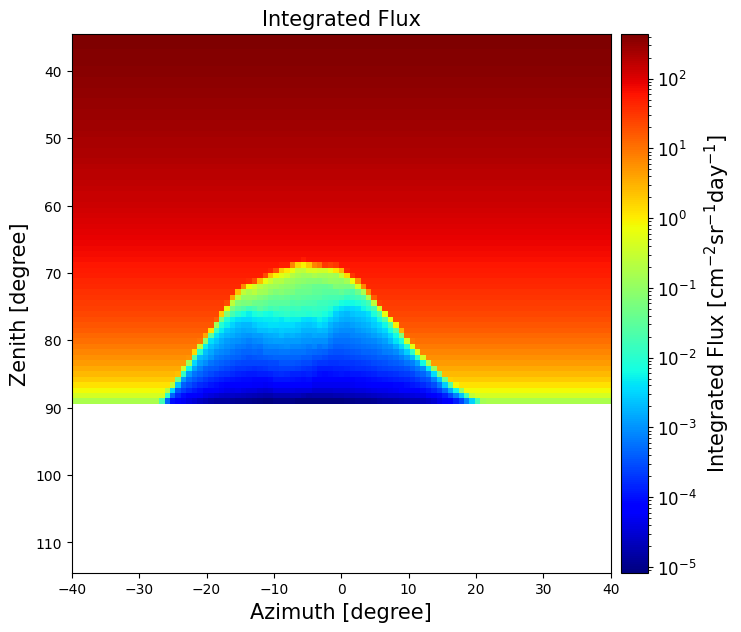

In [ ]:
cross_flux, open_flux = Measure.Flux()

## Muon transmission

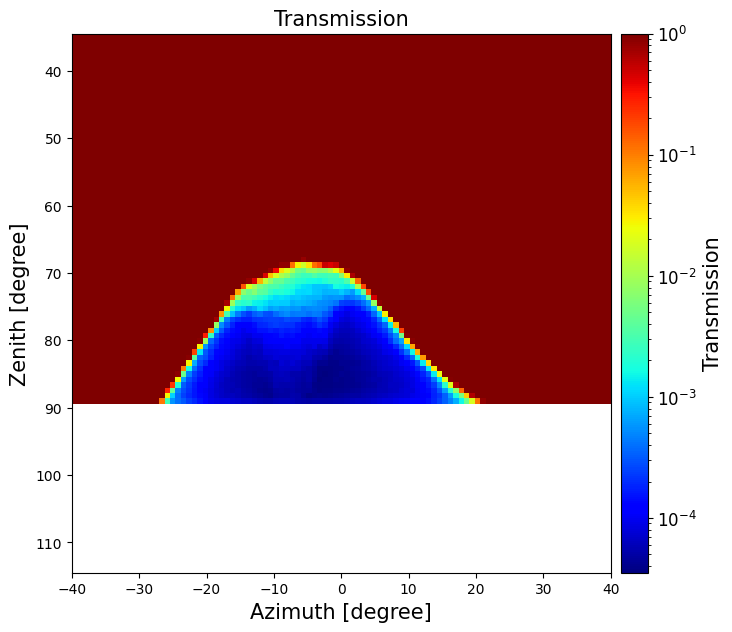

In [ ]:
transmission = Measure.Transmission()

## Modeling the muon telescope

In [ ]:
nBars = 50 # Number of scintillator strips
d = 3.4 # Pixel size
D = 200 # Separation of the telescope panels
L = 1710 # Distance to the volcano

Tel = telescope.telescopeParams(nBars, d, D, L, "jet", "MURAVES")

In [ ]:
solid = Tel.solid_angle()

In [ ]:
Tel.N_pixel()

In [ ]:
acceptance = Tel.acceptance()

## Telescope rate estimation

The measured number of muons is:

$$N(\varrho) = \Delta T \times \mathcal{T} \times \phi(\varrho)$$

where $\Delta T$ is the observation time, $\mathcal{T}$ the telescpe acceptance, and $\phi$ the traversing flux.

In [ ]:
# Flux in muons/m2s
rate = cross_flux*solid

In [ ]:
Measure.plot_mesured_flux(rate, "Measured Flux ", "[m$^{-2}$s$^{-1}$]")

In [ ]:
obs_time = 30 # days
N_muon = cross_flux*acceptance*obs_time

In [ ]:
Measure.plot_mesured_flux(N_muon, "Number of Muons ", " ")

In [ ]:
plt.figure(figsize=(10,8))

plt.imshow(rate*1e1/86400, cmap='jet', norm=mpl.colors.LogNorm())

clb = plt.colorbar()
clb.set_label(r'Flux [m$^{-2}$s$^{-1}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

plt.axis([20,65,68,30])

plt.savefig("MURAVES_rate.png", bbox_inches='tight', dpi=300)

plt.show()

In [ ]:
obs_time = 30
N_muon = cross_flux*acceptance*obs_time

In [ ]:
plt.figure(figsize=(10,8))

plt.imshow(N_muon, cmap='jet', norm=mpl.colors.LogNorm())

clb = plt.colorbar()
clb.set_label(r'Flux [m$^{-2}$s$^{-1}$]', fontsize = 25)
clb.ax.tick_params(labelsize = 20)

plt.axis([20,65,68,30])

plt.savefig("MURAVES_rate.png", bbox_inches='tight', dpi=300)

plt.show()